# Training using demo

Mask Rcnn 70, 21/4/22 annotations, 21/4/22 dataset, data 11

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
imagespath = "/content/drive/MyDrive/data12.zip"
testimagespath = "/content/drive/MyDrive/test1.zip"

In [ ]:
%tensorflow_version 1.x
!pip install --upgrade h5py==2.10.0
#!wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
#!unzip Mask_RCNN_basic_1.zip
!unzip Mask_RCNN.zip
import sys
sys.path.append("/content/Mask_RCNN/mrcnn")
from m_rcnn import *
from visualize import random_colors, get_mask_contours, draw_mask
%matplotlib inline

TensorFlow 1.x selected.
     |████████████████████████████████| 2.9 MB 10.1 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
Archive:  Mask_RCNN.zip
  inflating: Mask_RCNN/.gitignore    
   creating: Mask_RCNN/assets/
   creating: Mask_RCNN/images/
  inflating: Mask_RCNN/LICENSE       
  inflating: Mask_RCNN/MANIFEST.in   
   creating: Mask_RCNN/mrcnn/
 extracting: Mask_RCNN/mrcnn/__init__.py  
  inflating: Mask_RCNN/mrcnn/config.py  
  inflating: Mask_RCNN/mrcnn/m_rcnn.py  
  inflating: Mask_RCNN/mrcnn/model.py  
  inflating: Mask_RCNN/mrcnn/parallel_model.py  
  inflating: Mask_RCNN/mrcnn/utils.py  
  inflating: Mask_RCNN/mrcnn/visualize.py  
  inflating: Mask_RCNN/README.md     
  inflating: Mask_RCNN/requirements.txt  
  inflating: Mask_RCNN/Run_Mask_RCNN_on_images_(DEMO).ipynb  
   creating: Mask_RCNN/samples/
  inflating: Mask_RCNN/samples/demo.ipynb  
  inflating: Mask_RCNN/setu

Using TensorFlow backend.


... done downloading pretrained model!


In [ ]:
!nvidia-smi

Sat May 14 06:31:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
def load_test_model2(num_classes, project_name):
    inference_config = InferenceConfig(num_classes)
    model_dir = os.path.join(DRIVE_ROOT_DIR,  project_name)
    # Recreate the model in inference mode
    model = modellib.MaskRCNN(mode="inference",
                              config=inference_config,
                              model_dir=model_dir)

    # Get path to saved weights
    # Either set a specific path or find last trained weights
    # model_path = os.path.join(ROOT_DIR, ".h5 file name here")
    #model_path = model.find_last()
    model_path = "/content/drive/MyDrive/MangoModels/mask_rcnn_object_0005.h5"

    # Load trained weights
    print("Loading weights from ", model_path)
    model.load_weights(model_path, by_name=True)
    return model, inference_config

def test_random_image2(test_model, dataset_val, inference_config):
    image_id = random.choice(dataset_val.image_ids)
    original_image, image_meta, gt_class_id, gt_bbox, gt_mask = \
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)

    log("original_image", original_image)
    # log("image_meta", image_meta)
    # log("gt_class_id", gt_class_id)
    # log("gt_bbox", gt_bbox)
    # log("gt_mask", gt_mask)

    # Model result
    print("Trained model result")
    results = test_model.detect([original_image], verbose=1)
    r = results[0]
    visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'],
                                dataset_val.class_names, r['scores'], ax=get_ax(), show_bbox=False, figsize=(12, 12))

    print("Annotation")
    visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id,
                                dataset_val.class_names, figsize=(12, 12))

In [ ]:
# Extract Images
#images_path = "images.zip"
#annotations_path = "annotations.json"

#extract_images(os.path.join("/content/",images_path), "/content/dataset")


images_path = imagespath 
annotations_path = "/content/dataset/annotations.json"

extract_images(os.path.join("/content/",images_path), "/content/dataset")

test_images_path = testimagespath

Extracted: 594 images


In [ ]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/dataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/dataset/annotations.json
Annotation json path:  /content/dataset/annotations.json
Train: 210
Validation: 35
Classes: 1


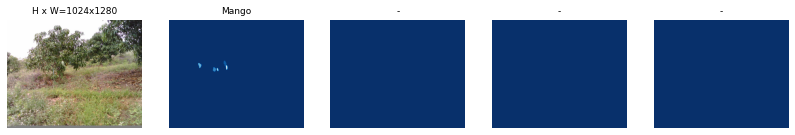

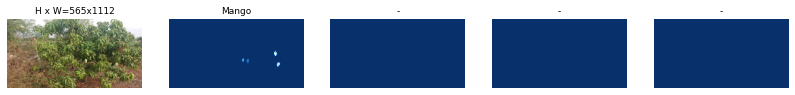

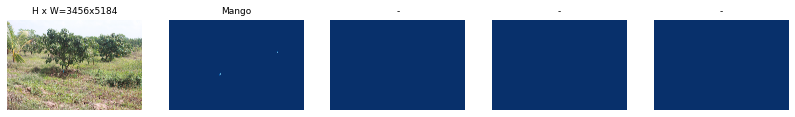

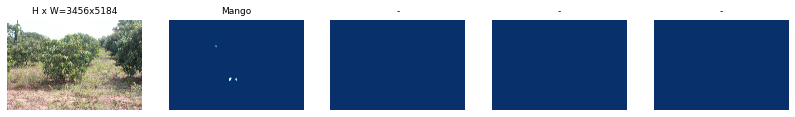

In [ ]:
# Load image samples
display_image_samples(dataset_train)

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
#config.display()
model = load_training_model(config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
/content/Mask_RCNN/mask_rcnn_coco.h5


In [ ]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/Mask_RCNN/logs/object20220514T0632/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn

In [ ]:
print('test')

test


In [ ]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/Mask_RCNN/logs/object20220514T0632/mask_rcnn_object_0008.h5
Re-starting from epoch 8


original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  201.00000  uint8
Trained model result
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  201.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   80.20000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Annotation


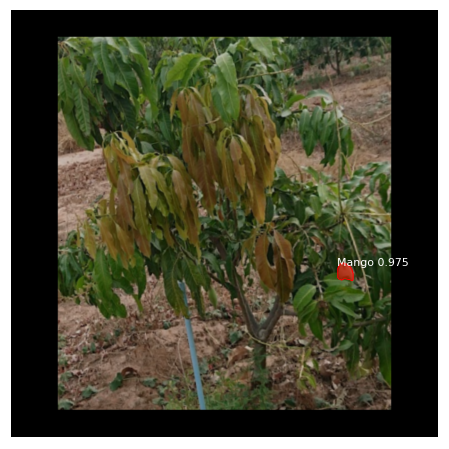

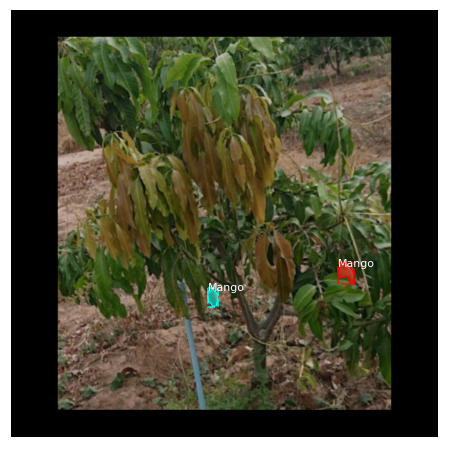

In [ ]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)

original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Annotation


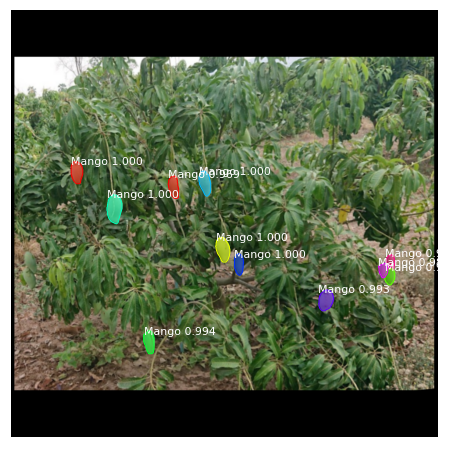

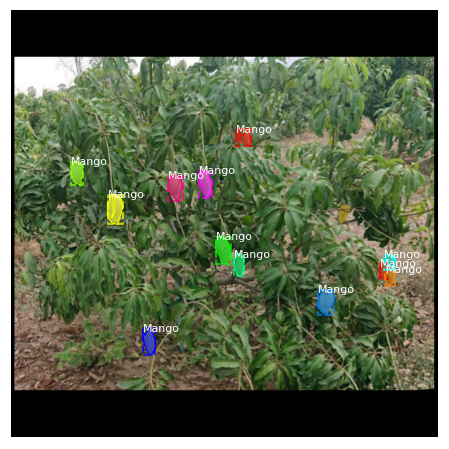

In [ ]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)

original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Annotation


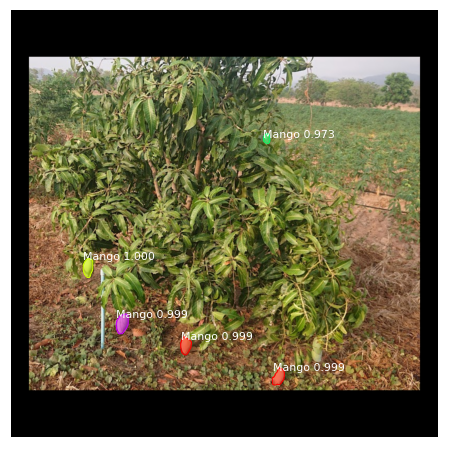

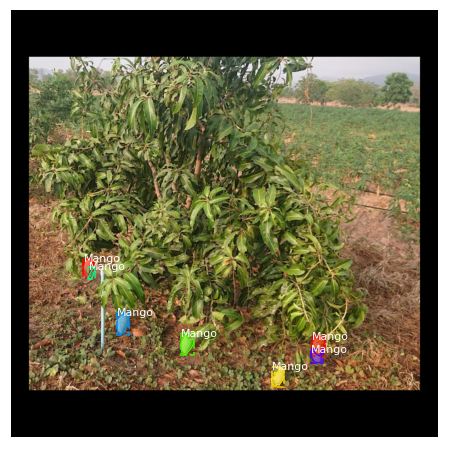

In [ ]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)

original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
Annotation


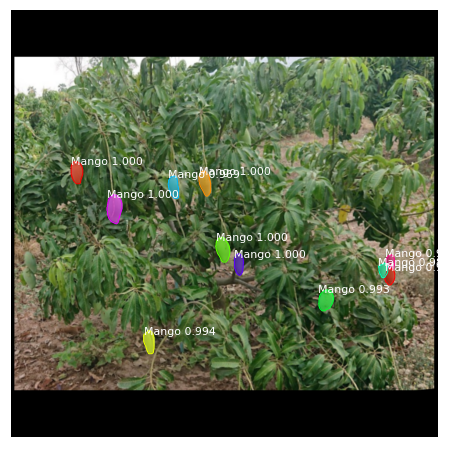

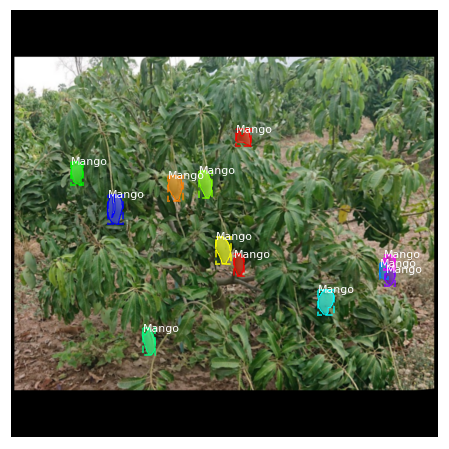

In [ ]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)

In [ ]:
img = cv2.imread("/content/Farm_a10.png")
print("Trained model result")
results = test_model.detect([img], verbose=1)
r = results[0]
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'],
                                dataset_val.class_names, r['scores'], ax=get_ax(), show_bbox=False, figsize=(12, 12))

Trained model result
Processing 1 images
image


AttributeError: ignored

In [ ]:
img = cv2.imread("/content/Farm_a18.png")
print("Trained model result")
results = test_model.detect([img], verbose=1)
r = results[0]
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'],
                                dataset_val.class_names, r['scores'], ax=get_ax(), show_bbox=False, figsize=(12, 12))

In [ ]:
img = cv2.imread("/content/Farm_a20_5.png")
print("Trained model result")
results = test_model.detect([img], verbose=1)
r = results[0]
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'],
                                dataset_val.class_names, r['scores'], ax=get_ax(), show_bbox=False, figsize=(12, 12))

In [ ]:
img = cv2.imread("/content/Farm_j10.png")
print("Trained model result")
results = test_model.detect([img], verbose=1)
r = results[0]
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'],
                                dataset_val.class_names, r['scores'], ax=get_ax(), show_bbox=False, figsize=(12, 12))

In [ ]:
img = cv2.imread("/content/Farm_j10_3.png")
print("Trained model result")
results = test_model.detect([img], verbose=1)
r = results[0]
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'],
                                dataset_val.class_names, r['scores'], ax=get_ax(), show_bbox=False, figsize=(12, 12))

In [ ]:
img = cv2.imread("/content/Farm_a20_6.png")
print("Trained model result")
results = test_model.detect([img], verbose=1)
r = results[0]
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'],
                                dataset_val.class_names, r['scores'], ax=get_ax(), show_bbox=False, figsize=(12, 12))

In [ ]:
img = cv2.imread("/content/Farm_j27.png")
print("Trained model result")
results = test_model.detect([img], verbose=1)
r = results[0]
visualize.display_instances(img, r['rois'], r['masks'], r['class_ids'],
                                dataset_val.class_names, r['scores'], ax=get_ax(), show_bbox=False, figsize=(12, 12))

In [ ]:
!zip -r /content/MaskRcnn050522.zip /content/Mask_RCNN/logs

In [ ]:
from google.colab import files
files.download("/content/MaskRcnn050522.zip")

In [ ]:
print('test')